# **Estatistica Descritiva**

## Análise preços de casa

**Importando as bibliotecas usadas**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt

%matplotlib inline

**Carregando dataset House Pricing**

In [2]:
df_house_pricing = pd.read_csv("datasets/house_price.csv")

In [4]:
df_house_pricing.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


### **Descrição dos atribultos do DataFrame**


<p>
       <ul>
              <li>
                      <strong>SalePrice:</strong> Preço de venda
              </li>
              <li>
                      <strong>OverallQual:</strong> Avalie o material geral e o acabamento da casa
              </li>
              <li>
                     <strong>OverallCond:</strong> Avalia a condição geral da casa
              </li>
              <li>
                     <strong>BedroomAbvGr:</strong> Quartos acima do nível (NÃO inclui quartos no subsolo)
              </li>
              <li>
                      <strong>TotRmsAbvGrd:</strong> Total de quartos acima da classe  (não inclui banheiros)
              </li>
              <li>
                    <strong>GrLivArea:</strong> Acima do nível (solo) da área de estar em pés quadrados
              </li>
              <li>
                     <strong>TotalBsmtSF:</strong> Total de pés quadrados da área do porão
              </li>
              <li>
                     <strong>YearBuilt:</strong> Data original de construção
              </li>
              <li>
                     <strong>MSZoning</strong> - Identifica a classificação geral de zoneamento da venda
                     <ul>
                            <li>
                                   <strong>A</strong>    Agriculture (Agricultura)
                             </li>
                             <li>
                                   <strong>C</strong>    Commercial (Comercial)
                             </li>
                             <li>
                                   <strong>FV</strong>    Floating Village Residential (Residencial Vila Flutuante)
                             </li> 
                             <li>
                                   <strong>I</strong>     Industrial (Industrial)
                             </li>
                             <li>
                                   <strong>RH</strong>    Residential High Density (Residencial Alta Densidade)
                             </li>
                             <li>
                                   <strong>RL</strong>    Residential Low Density (Residencial Baixa densidade)
                             </li>
                             <li>
                                    <strong>RP</strong>    Residential Low Density Park  (Parque residencial de baixa densidade)
                             </li>
                             <li>
                                     <strong>RM</strong>    Residential Medium Density  (Residencial Média Densidade)
                             </li>
                     </ul>
              </li>
              <li>
                     <strong>Utilities:</strong> Tipo de utilitários disponíveis
                     <ul>
                            <li>
                                   <strong>AllPub</strong>    All public Utilities (E,G,W,& S) (Todos os serviços públicos (E,G,W e S))
                             </li>
                             <li>
                                   <strong>NoSewr</strong>    Electricity, Gas, and Water (Septic Tank) (Eletricidade, Gás e Água (Fossa séptica))
                             </li>
                             <li>
                                   <strong>NoSeWa</strong>    Electricity and Gas Only (Apenas eletricidade e gás)
                             </li>
                             <li>
                                   <strong>ELO</strong>       Electricity only (Somente eletricidade)
                             </li>
                     </ul>
              </li>
              <li>
                     <strong>BldgType:</strong> Tipo de moradia
                     <ul>
                            <li>
                                   <strong>1Fam</strong>      Single-family Detached  (Desanexação unifamiliar)
                             </li>
                             <li>
                                   <strong>2FmCon</strong>    Two-family Conversion; originally built as one-family dwelling (Conversão de duas famílias; originalmente construído como residência unifamiliar)
                             </li>
                             <li>
                                    <strong>Duplx</strong>     Duplex (Dúplex)
                             </li>
                             <li>
                                   <strong>TwnhsE</strong>    Townhouse End Unit (Unidade final da moradia)
                             </li>
                             <li>
                                    <strong>TwnhsI</strong>    Townhouse Inside Unit (Townhouse dentro da unidade)
                             </li>
                     </ul>
              </li>
       </ul>
</p>




In [3]:
df_house_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Verificando se o dataframe possui valores nulos

In [5]:
df_house_pricing.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

Obtendo as medidas de tendência centrais mais usuais, Média, Mediana e Moda

In [9]:
mean = df_house_pricing["SalePrice"].mean()
median = df_house_pricing["SalePrice"].median()
mode = df_house_pricing["SalePrice"].mode()

print(f"\nMean: {mean:.2f}\nMedian: {median}\nMode: {mode}")


Mean: 180921.20
Median: 163000.0
Mode: 0    140000
Name: SalePrice, dtype: int64


Analisando os valores obtidos da média, mediana e moda, podemos concluir que a média possui seu valor maior do que o valor da mediana, isso dá evidencias de que a distribuição dos dados de presificação das casas é Assimétrica Negativa, ou seja, é possível que existam poucos casas com precificação alta que deslocam a média para longe da mediana tornando a distribuição assimétrica negativa.

Podemos observar essa informação de uma forma mais visual usando um boxplot

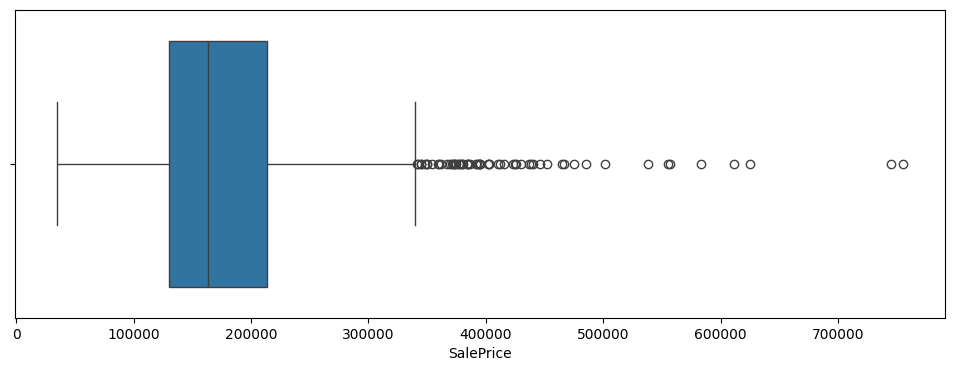

In [15]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_house_pricing.SalePrice)
plt.show()

In [18]:
df_house_pricing["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

A partir dos dados de tendência central e do gráfico boxplot podemos comprovar que existe outliers que influenciam na distribuição dos dados, como a média é sencível a outliers seu valor ficou distante da mediana. O boxplot permitiu observar os outliers de forma visual dando mais robustes a análise.